## Función de correlación de un par de anillos
## Implementación en Python 
### José Alberto Moreno Guerra

In [1]:
from mpl_toolkits import mplot3d
import numpy as np
import scipy.stats as st
from random import random
import matplotlib.pyplot as plt
import math 
from IPython.display import display
from IPython.core.pylabtools import figsize, getfigs
plt.style.use('classic')
%matplotlib inline

In [2]:
def anillos(R,r,n,i):
    tcx=np.zeros(n)
    tcy=np.zeros(n)
    tcz=np.zeros(n)
    np.random.seed(i)
    centro1=0.0
    centro2=0.0
    for i in range(n):
        alpha=np.random.uniform(0, 2.*np.pi)
        beta=np.random.uniform(0, 2.*np.pi)
        x2=(R+r*math.cos(alpha))*math.cos(beta)-centro1
        y2=(R+r*math.cos(alpha))*math.sin(beta)-centro2
        z2=r*math.sin(alpha)
        tcx[i]=x2
        tcy[i]=y2
    circle = plt.Circle((-centro1, -centro2), (R-r)-10.0, color='k', fill=False)
    plt.gcf().gca().add_artist(circle)
    circle = plt.Circle((-centro1, -centro2), (R+r)+10.0, color='k', fill=False)
    plt.gcf().gca().add_artist(circle)
    return tcx,tcy

### Generamos una distribución de puntos aleatoria

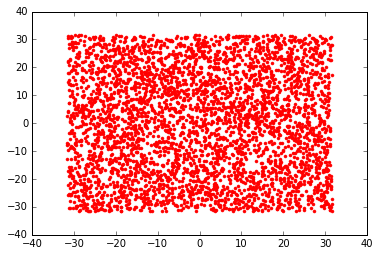

In [3]:
#n=386
n=4000
rho=1
dim=np.sqrt(n/rho)
d=dim/np.sqrt(n)
radx=[]
rady=[]
for i in range(n):
    radx.append((random()-0.5)*dim)
    rady.append((random()-0.5)*dim)
plt.plot(radx,rady, 'r.')
plt.show()

### Generamos la distribución de anillos

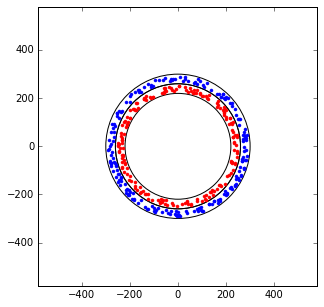

In [4]:
plt.figure(figsize=(5,5))
c1_data=anillos(280,10,200,1)
plt.plot(c1_data[0],c1_data[1], 'b.')
c2_data=anillos(240,10,186,2)
plt.plot(c2_data[0],c2_data[1], 'r.')
plt.axis([-(2*240+100), (2*240+100), -(2*240+100), (2*240+100)]) 
plt.show()

In [5]:
#plt.figure(figsize=(5,5))
vtx = []
vty = []
nx=np.size(c1_data[0])
ny=np.size(c2_data[1])
dx=c1_data[0]
dy=c1_data[1]
d2x=c2_data[0]
d2y=c2_data[1]
for i in range(nx):
    vtx.append(dx[i])
    vty.append(dy[i])
for i in range(ny):
    vtx.append(d2x[i])
    vty.append(d2y[i])
#plt.plot(vtx,vty,'b.')
#plt.axis([-(2*240+100), (2*240+100), -(2*240+100), (2*240+100)]) 
#plt.show()

### Estimador de Landy-Szalay 

$\zeta (r)=1+\left ( \frac{N_{rd}}{N} \right )^{2}\frac{DD(r)}{RR(r)}-2\frac{N_{rd}}{N}\frac{DR(r)}{RR(r)}$

In [10]:
def LSzalay(x,y,xrand,yrand,dim,t_bins,w_1,w_2):
    global xf, err
    nrd = np.size(xrand)
    n = np.size(x)
    dmax = math.sqrt(2.0*(dim**2))
    ran = dmax/t_bins
    bins=np.linspace(0.0,dmax,t_bins)
    rdist = []
    drand = []
    vdist = []
    DR = []
    gr = np.zeros(t_bins)
    grand = np.zeros(t_bins)
    grd = np.zeros(t_bins)
    
    errls = np.zeros(t_bins)
    for i in range(n):
        v_dist = math.sqrt(x[i]**2 + y[i]**2)
        vdist.append(v_dist)
        for j in range(i+1,n-1):
            r_dr = math.sqrt(((x[i]-xrand[j])**2)+(y[i]-yrand[j])**2)
            r = math.sqrt(((x[i]-x[j])**2)+(y[i]-y[j])**2)
            r_rand = math.sqrt(((xrand[i]-xrand[j])**2)+(yrand[i]-yrand[j])**2)
            rdist.append(r)
            drand.append(r_rand)
            DR.append(r_dr)
    for i in range(t_bins):
        for j in range(n):
            if(vdist[j]<280.0):
                w = w_2
            else:
                w = w_1
            r = np.uint32((rdist[j])/ran)
            r_rand = np.uint32((drand[j])/ran)
            r_dr = np.uint32((DR[j])/ran)
            if(r<dmax):
                if(r<t_bins):
                    gr[int(r)]=gr[int(r)]+w
            if(r_rand<dmax):
                if(r_rand<t_bins):
                    grand[int(r_rand)]=grand[int(r_rand)]+1
            if(r_dr<dmax):
                if(r_dr<t_bins):
                    grd[int(r_dr)]=grd[int(r_dr)]+w
    for i in range(t_bins):
        if(grand[i]!=0):
            errls[i]=(1+(((nrd/n)**2.)*(gr[i]/grand[i]))-2*(nrd/n)*(grd[i]/grand[i]))
    xfls=np.linspace(0,460,np.size(errls))
    plt.plot(xfls,errls/np.max(errls),'o-', label='Landy-Szalay')
    plt.xlabel("$r$",fontsize = 20)   # Establece el título del eje x
    plt.ylabel("$\zeta (r)$",fontsize = 20)   # Establece el título del eje y

### Función de correlación pesada por un factor 0.5 y 2 para los puntos (azul y rojo)

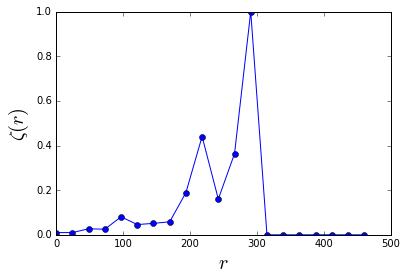

In [11]:
LSzalay(vtx,vty,radx,rady,dim,20,0.5,2)